# CUESTIÓN 3. Visualización de datos


<AxesSubplot:title={'center':'cantidad de corredores clasificados por su velocidad'}>

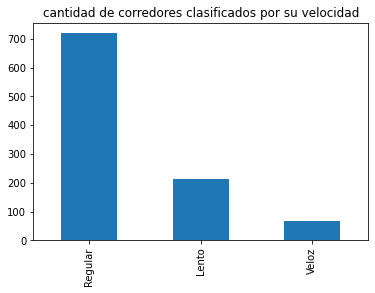

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.animation import FuncAnimation

datos=pd.read_csv("https://raw.githubusercontent.com/ernesto106/HitoIndividual2-SGE_Ernesto/main/categorias%20de%20corredores.csv")
df=pd.DataFrame(datos)

# Gráfico de barras que nos muestra la cantidad de corredores clasificados por su velocidad

df['Velocidad'].value_counts().plot(kind="bar", title="cantidad de corredores clasificados por su velocidad")   

<AxesSubplot:title={'center':'porcentaje de corredores clasificados por su velocidad'}, ylabel='Velocidad'>

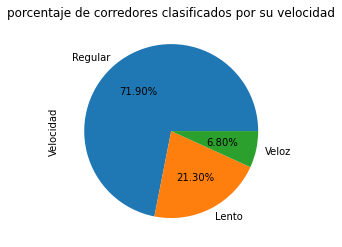

In [2]:

# Gráfico circular que muestra el porcentaje de corredores clasificados por su velocidad

df['Velocidad'].value_counts().plot(kind="pie", autopct='%.2f%%', title="porcentaje de corredores clasificados por su velocidad")

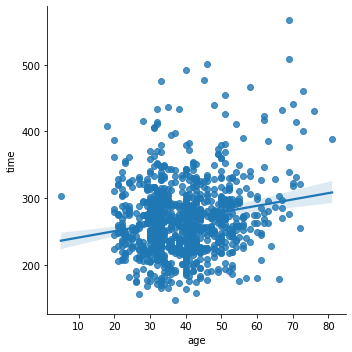

In [3]:
"""
Grafico combinado que muestra la correlacion existente entre la edad de los corredores y sus respectivos tiempos. 
Como vemos, cuanto menor es la edad, el corredor consigue un mejor tiempo, 
pero cuanta mas edad, el tiempo que tarda en completar la carrera es mayor. 

"""

g=sns.lmplot(x='age', y='time', data=df,palette='Set1')


<AxesSubplot:xlabel='gender'>

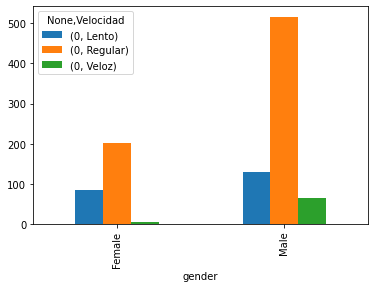

In [4]:
"""
Gráfico de barras pareado que muestra la cantidad de corredores por genero y su clasificación por velocidad. 
Como vemos, el gráfico muestra que los hombres han sido mas rápidos que las mujeres. 

"""

velocidad_genero=datos.groupby(['Velocidad', 'gender']).size()
velocidad_genero=velocidad_genero.reset_index()
velocidad_genero=pd.pivot_table(velocidad_genero, columns='Velocidad', index="gender")
velocidad_genero.plot(kind='bar')


<IPython.core.display.Javascript object>


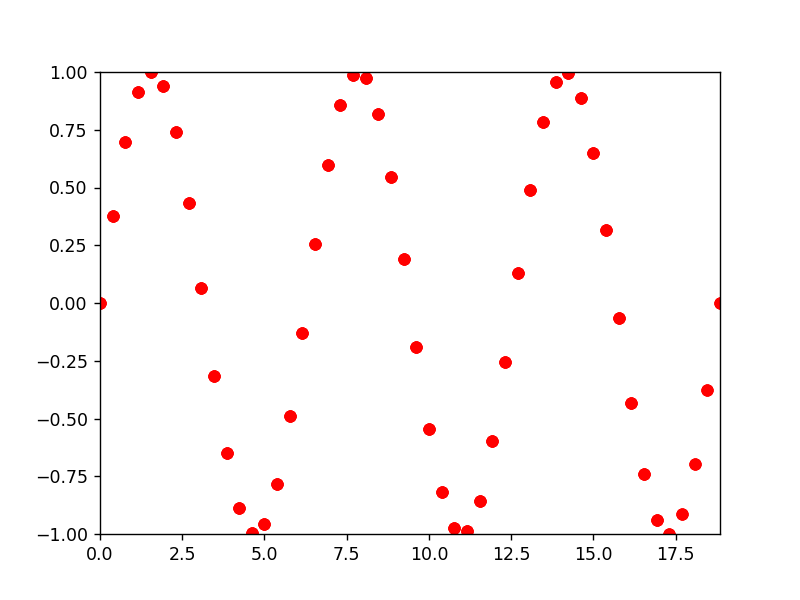

In [5]:
%matplotlib nbagg
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
xdata, ydata=[], []
ln,=plt.plot([], [], 'ro')

# Gráfica animada

def init():
    ax.set_xlim(0, 6*np.pi)
    ax.set_ylim(-1,1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani= FuncAnimation(fig, update, frames=np.linspace(0, 6*np.pi, 50),
                   interval=100, init_func=init, blit=True)
plt.show()